In [227]:
#importing the necessary libraries
#libraries for Data Manupulation and Data Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#for ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

#Libraries for Training the Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [228]:
#loading the data in the python environment

File_path = "//Users//sharibealam//Desktop//MY_LEARNINGS//ML_AI_UPGRAD//day.csv"
bike=pd.read_csv(File_path)
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


The Dataset is have 730 rows and 16 columns

In [229]:
#checking the description of the datasaet
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [230]:
#checking the shape of the data
bike.shape

(730, 16)

In [231]:
#checking the detailed info for the datset
#checking the count, different datatypes that are present in the dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [232]:
#checking for the null values if any
bike.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [233]:
bike_dup=bike.copy()

In [234]:
#veryfing if the duplicate df has been created
bike_dup.shape

(730, 16)

In [235]:
#Dropping the duplicates
bike_dup.drop_duplicates(inplace=True)

In [236]:
#verying the shape to check if there is count change
bike_dup.shape

(730, 16)

In [237]:
#checking the value counts
bike.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [238]:
#encoding the season column for better readability
bike['season']=bike.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [239]:
#Validating the encoding
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [240]:
#encoding the yr column for better readability
bike.yr=bike.yr.map({0:'2018',1:'2019'})

In [241]:
#Validating the encoding
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


ENCODING THE- mnth, weekday, weathersit columns for better readlablity 

In [242]:
bike['mnth']=bike['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike.weekday=bike.weekday.map({0:'Sun',1:'Mon',2:'Tues',3:'Wed',4:'Thurs',5:'Fri',6:'Sat'})
bike.weathersit = bike.weathersit.map({1:'Clear',2:'Mist',3:'Light_snowrain',4:'Heavy_snowrain'})

In [243]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,0,Tues,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [244]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    object 
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(6)
memory usage: 91.4+ KB


CREATING THE DERIVED COLUMN:


In [245]:
bike['days_old'] = (pd.to_datetime(bike['dteday'],format = '%d-%m-%Y')-pd.to_datetime('01-01-2018', format= '%d-%m-%Y')).dt.days


DROPPING OFF THE COLUMNS WHICH ARE NOT NECESSARY FOR THE DATA VISUALIZATION

In [246]:
bike.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)

In [247]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 74.3+ KB


SEGREGATION OF NEMERICAL AND CATOGERICAL COLUMNS FOR FINDING THE CORRELATION AND PLOTTING HEATMAP

In [248]:
cat_cols=bike.select_dtypes(include=['object']).columns.tolist()
num_cols=bike.select_dtypes(exclude=['object']).columns.tolist()

In [249]:
# Veriying the segregation
print('Numerical columns:',num_cols)
print('Categorical columns:',cat_cols)

Numerical columns: ['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old']
Categorical columns: ['season', 'yr', 'mnth', 'weekday', 'weathersit']


DATA ANALYSIS:


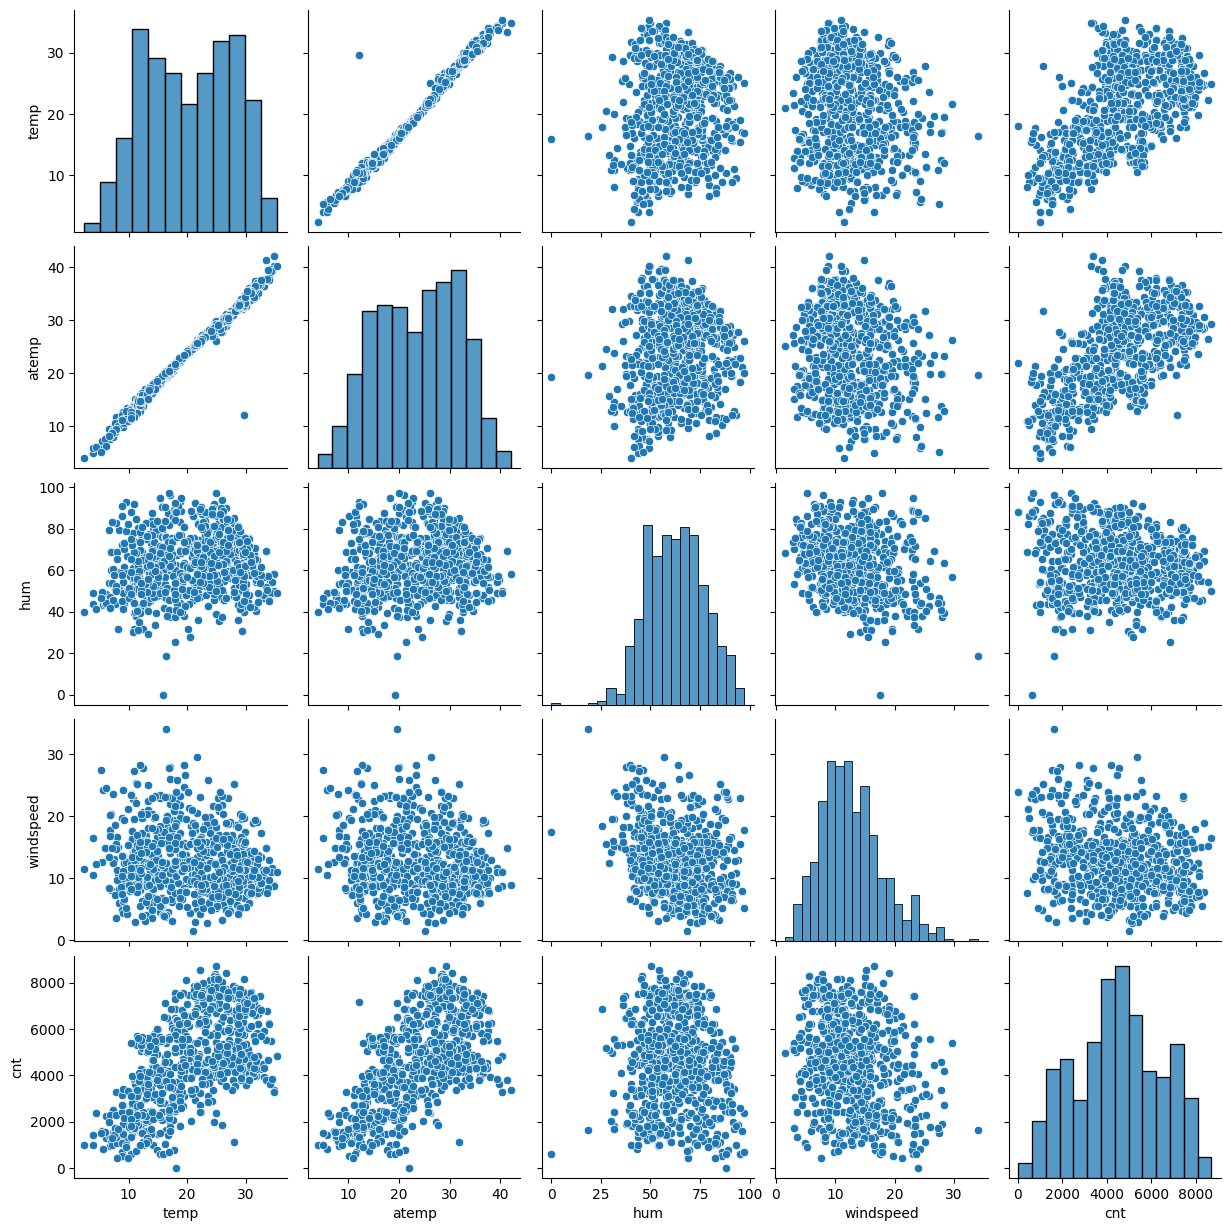

In [250]:
sns.pairplot(vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt'],data=bike)
plt.show()

OBSERVATION:
From the above we can see that atemp vs temp shows linear relation AND cnt vs temp also shows similar linear pattern

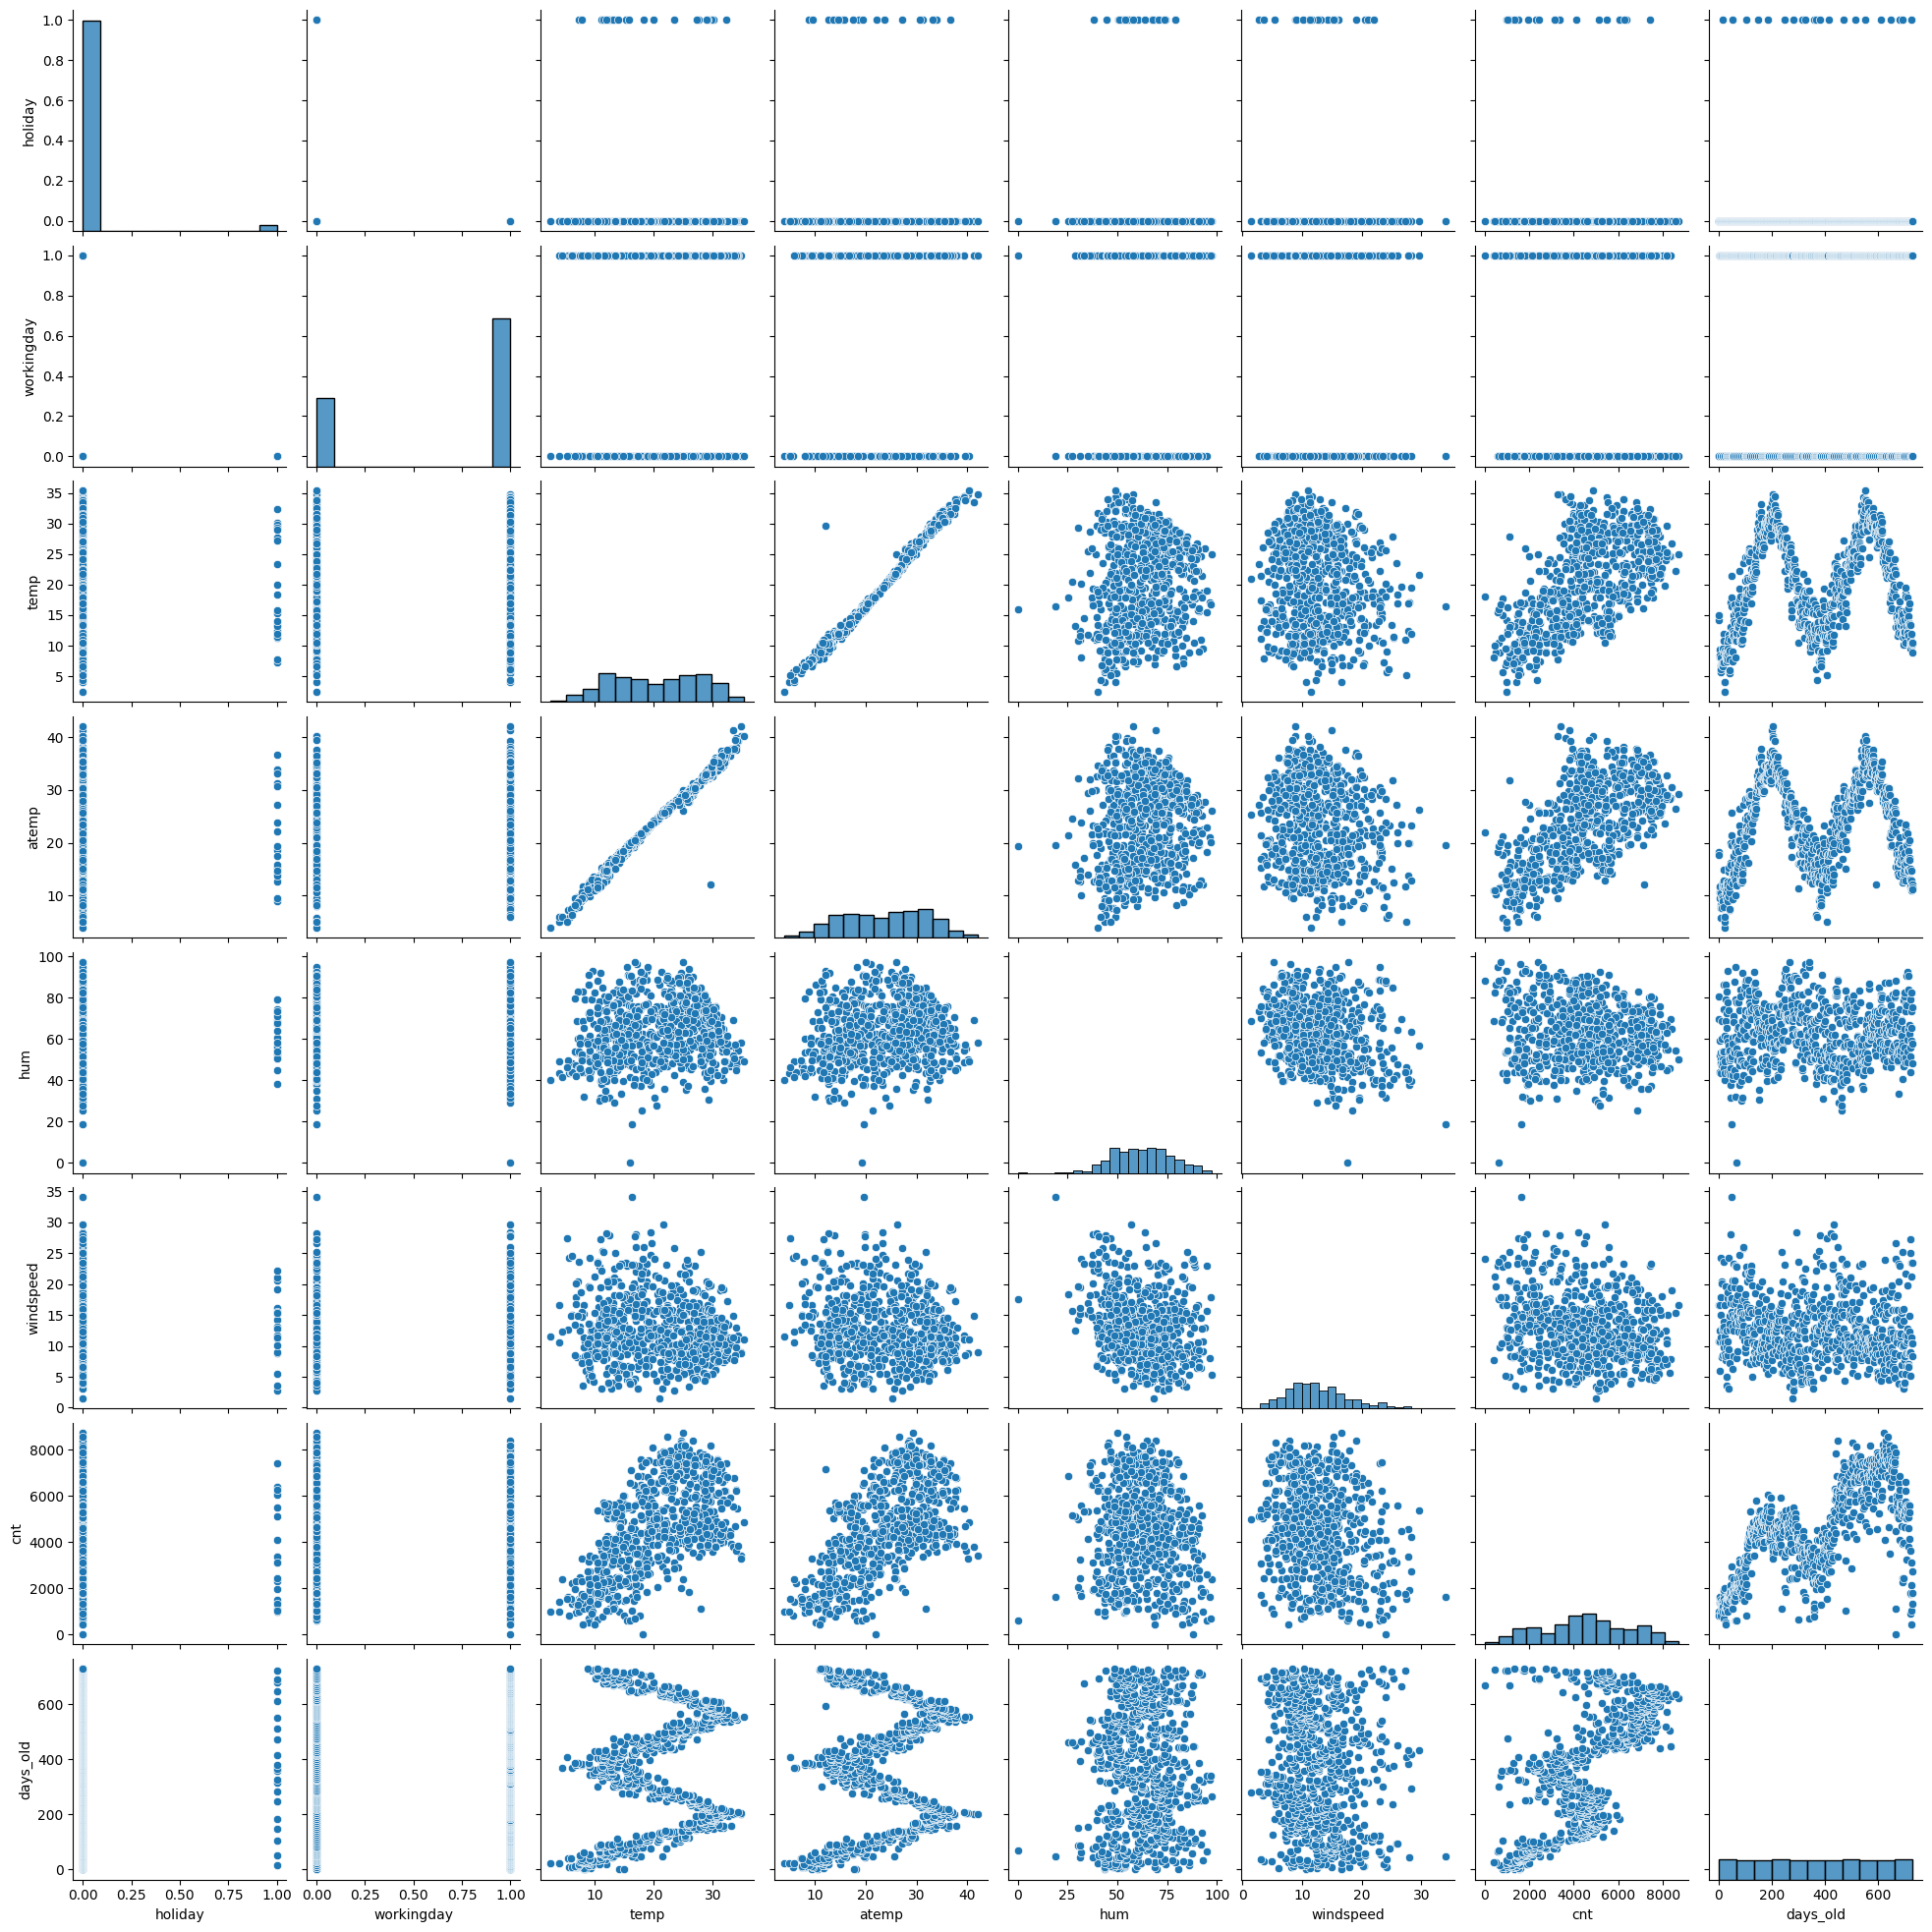

In [251]:
sns.pairplot(bike[num_cols])

FOR VISUALIZING THE OUTLINERS:


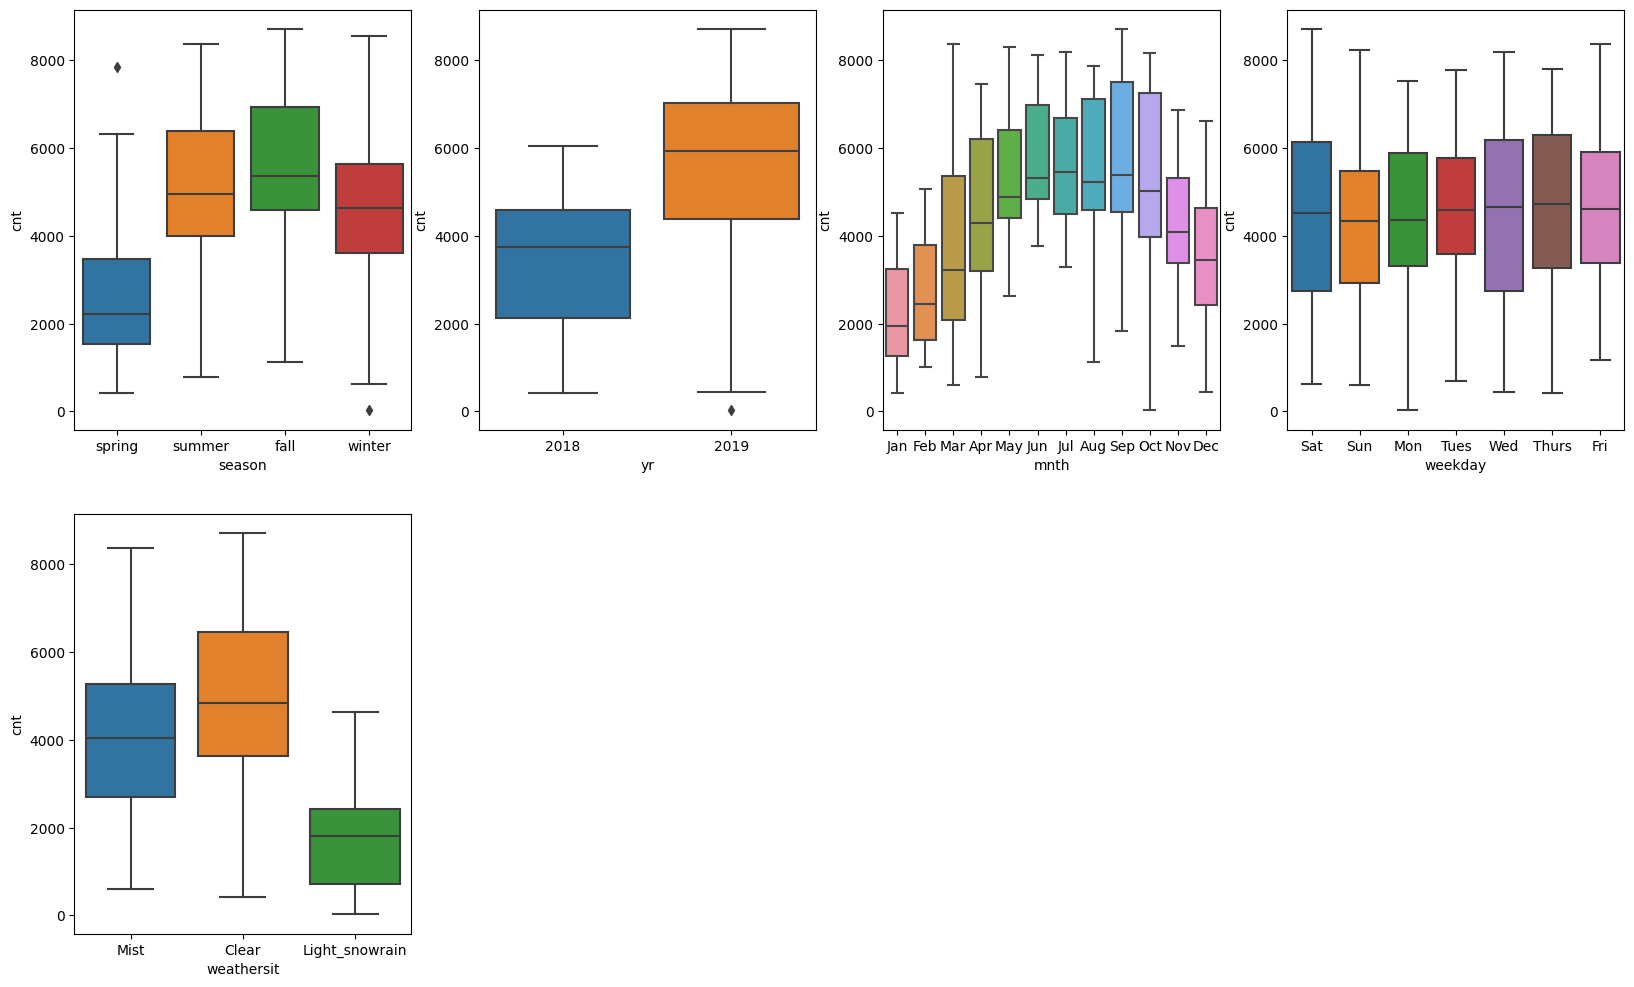

In [252]:
#numerical columns

plt.figure(figsize=(20, 12))
for index, col in enumerate(cat_cols, start=1):
    plt.subplot(2,4,index)
    sns.boxplot(data=bike,x=col,y='cnt')

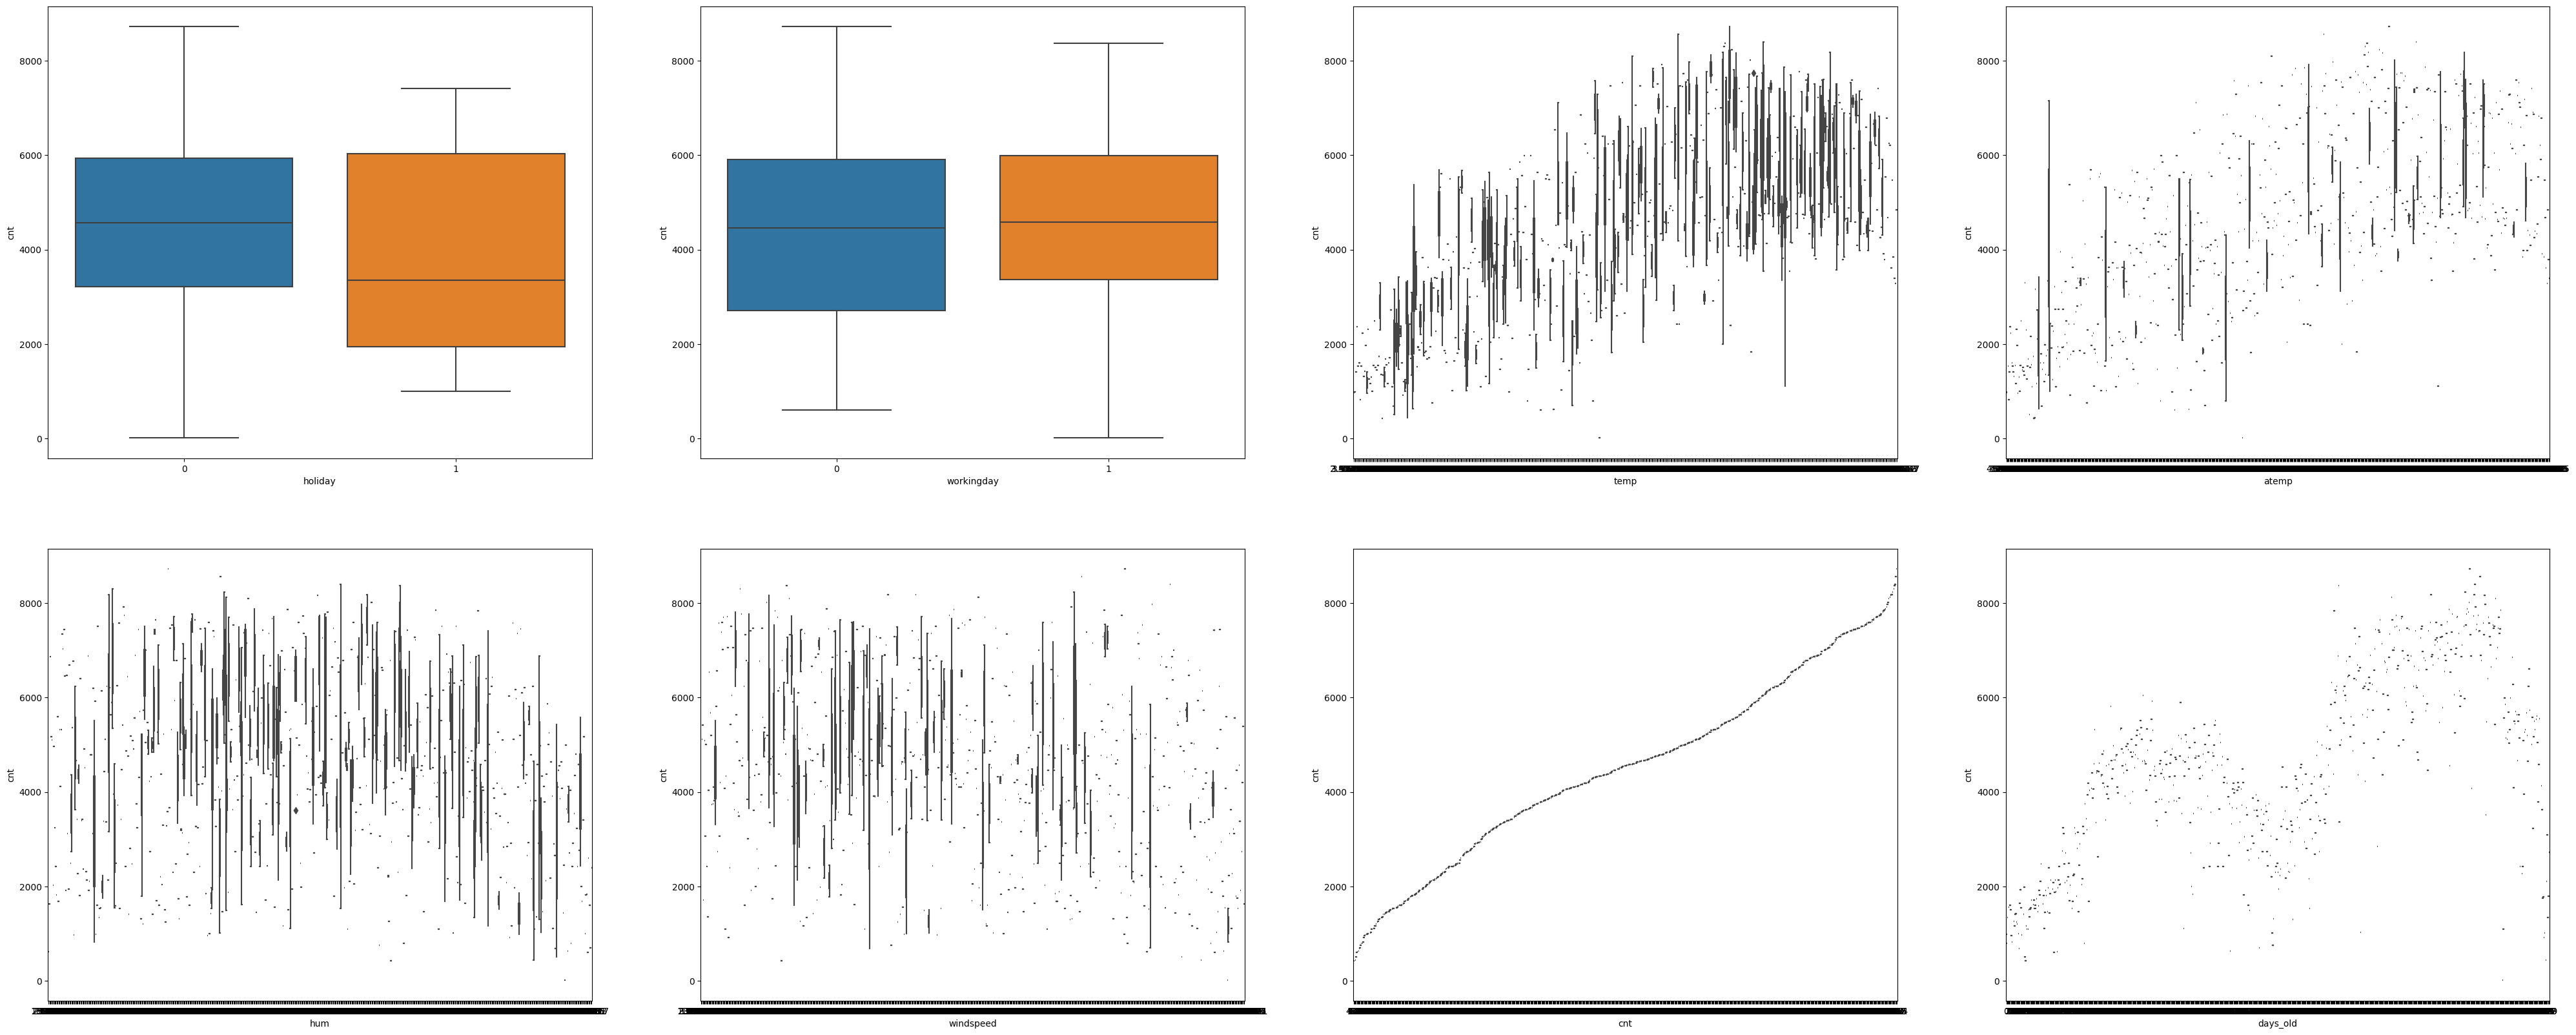

In [253]:
#categotrical columns
plt.figure(figsize=(50, 20))
for index, col in enumerate(num_cols, start=1):
    plt.subplot(2,4,index)
    sns.boxplot(data=bike,x=col,y='cnt')

OBSERVATION:
From the avove we can see that there are no outliners in the data

In [254]:
bike_corr=bike[num_cols].corr()

<Axes: >

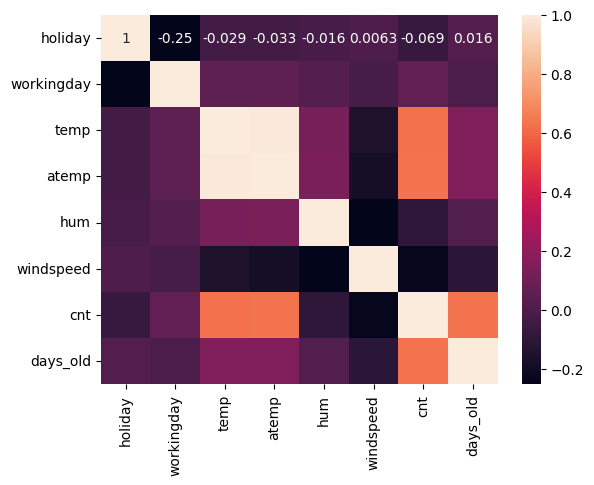

In [255]:
sns.heatmap(bike_corr,annot=True)

CHECKING THE LINEARITY RELATIONSHIP AS PER THE CORELATION MATRIX:


<Axes: title={'center': 'Cnt vs hum'}, xlabel='hum', ylabel='cnt'>

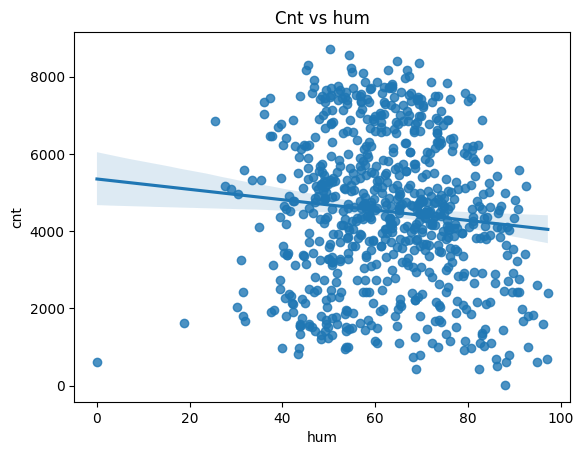

In [256]:
plt.title('Cnt vs hum')
sns.regplot(data = bike,y = 'cnt', x='hum')

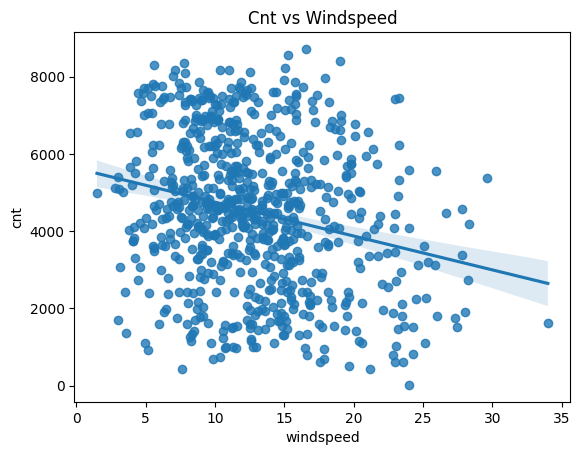

In [257]:
plt.title('Cnt vs Windspeed')
sns.regplot(data = bike, y ='cnt', x = 'windspeed')
plt.show()

#CREATIING THE DUMMY VARIABLES FOR THE CATEGORICAL DATA:

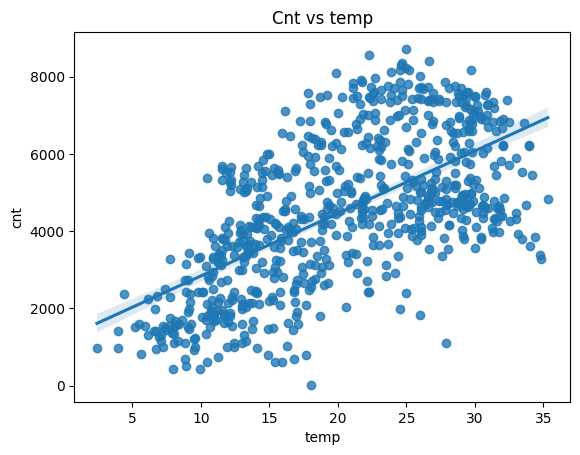

In [258]:
plt.title('Cnt vs temp')
sns.regplot(data = bike, y ='cnt', x = 'temp')
plt.show()

In [259]:
bike =pd.get_dummies(data = bike,columns = cat_cols,drop_first = True).astype(int)

In [260]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   holiday                    730 non-null    int64
 1   workingday                 730 non-null    int64
 2   temp                       730 non-null    int64
 3   atemp                      730 non-null    int64
 4   hum                        730 non-null    int64
 5   windspeed                  730 non-null    int64
 6   cnt                        730 non-null    int64
 7   days_old                   730 non-null    int64
 8   season_spring              730 non-null    int64
 9   season_summer              730 non-null    int64
 10  season_winter              730 non-null    int64
 11  yr_2019                    730 non-null    int64
 12  mnth_Aug                   730 non-null    int64
 13  mnth_Dec                   730 non-null    int64
 14  mnth_Feb                  

In [261]:
bike.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_snowrain,weathersit_Mist
0,0,0,14,18,80,10,985,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,14,17,69,16,801,1,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,8,9,43,16,1349,2,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8,10,59,10,1562,3,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,9,11,43,12,1600,4,1,0,...,0,0,0,0,0,0,0,1,0,0


SPLITTING THE DATA INTO TEST TRAIN IN THE RATIO OF 70:30 i.e., 70[TRAIN], 30[TEST]:

In [262]:
df_train, df_test = train_test_split(bike, train_size = 0.7, random_state = 100)

In [263]:
print(df_train.shape)
print(df_test.shape)

(510, 31)
(220, 31)


RESCALLING USING MIN_MAX:

In [264]:
#initiation the object
scaler = MinMaxScaler()

#apply to all the continues except the dummy ones
numerical_var=['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[numerical_var]=scaler.fit_transform(df_train[numerical_var])

In [265]:
#Head of the df_train to check after scaling
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_snowrain,weathersit_Mist
576,0,1,0.818182,0.769231,0.721649,0.28125,0.827658,576,0,0,...,0,0,0,0,0,0,1,0,0,0
426,0,0,0.424242,0.435897,0.639175,0.25000,0.465255,426,1,0,...,0,0,0,1,0,0,0,0,0,1
728,0,0,0.242424,0.205128,0.494845,0.65625,0.204096,728,1,0,...,0,0,0,0,1,0,0,0,0,0
482,0,0,0.393939,0.384615,0.494845,0.18750,0.482973,482,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,1,0.333333,0.333333,0.742268,0.37500,0.191095,111,0,1,...,0,0,0,0,0,0,0,0,0,1


In [266]:
#correlation of the NUmerical cols
df_train_corr_num_cols=df_train[numerical_var].corr()

<Axes: >

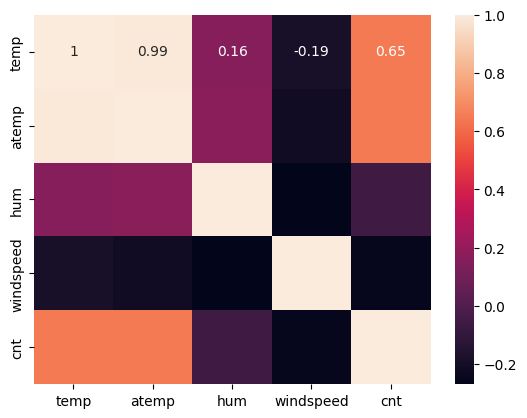

In [267]:
#heatmap
sns.heatmap(df_train_corr_num_cols,annot=True)

In [268]:

#correlation of the dataframe
df_train_corr=df_train.corr()

<Axes: >

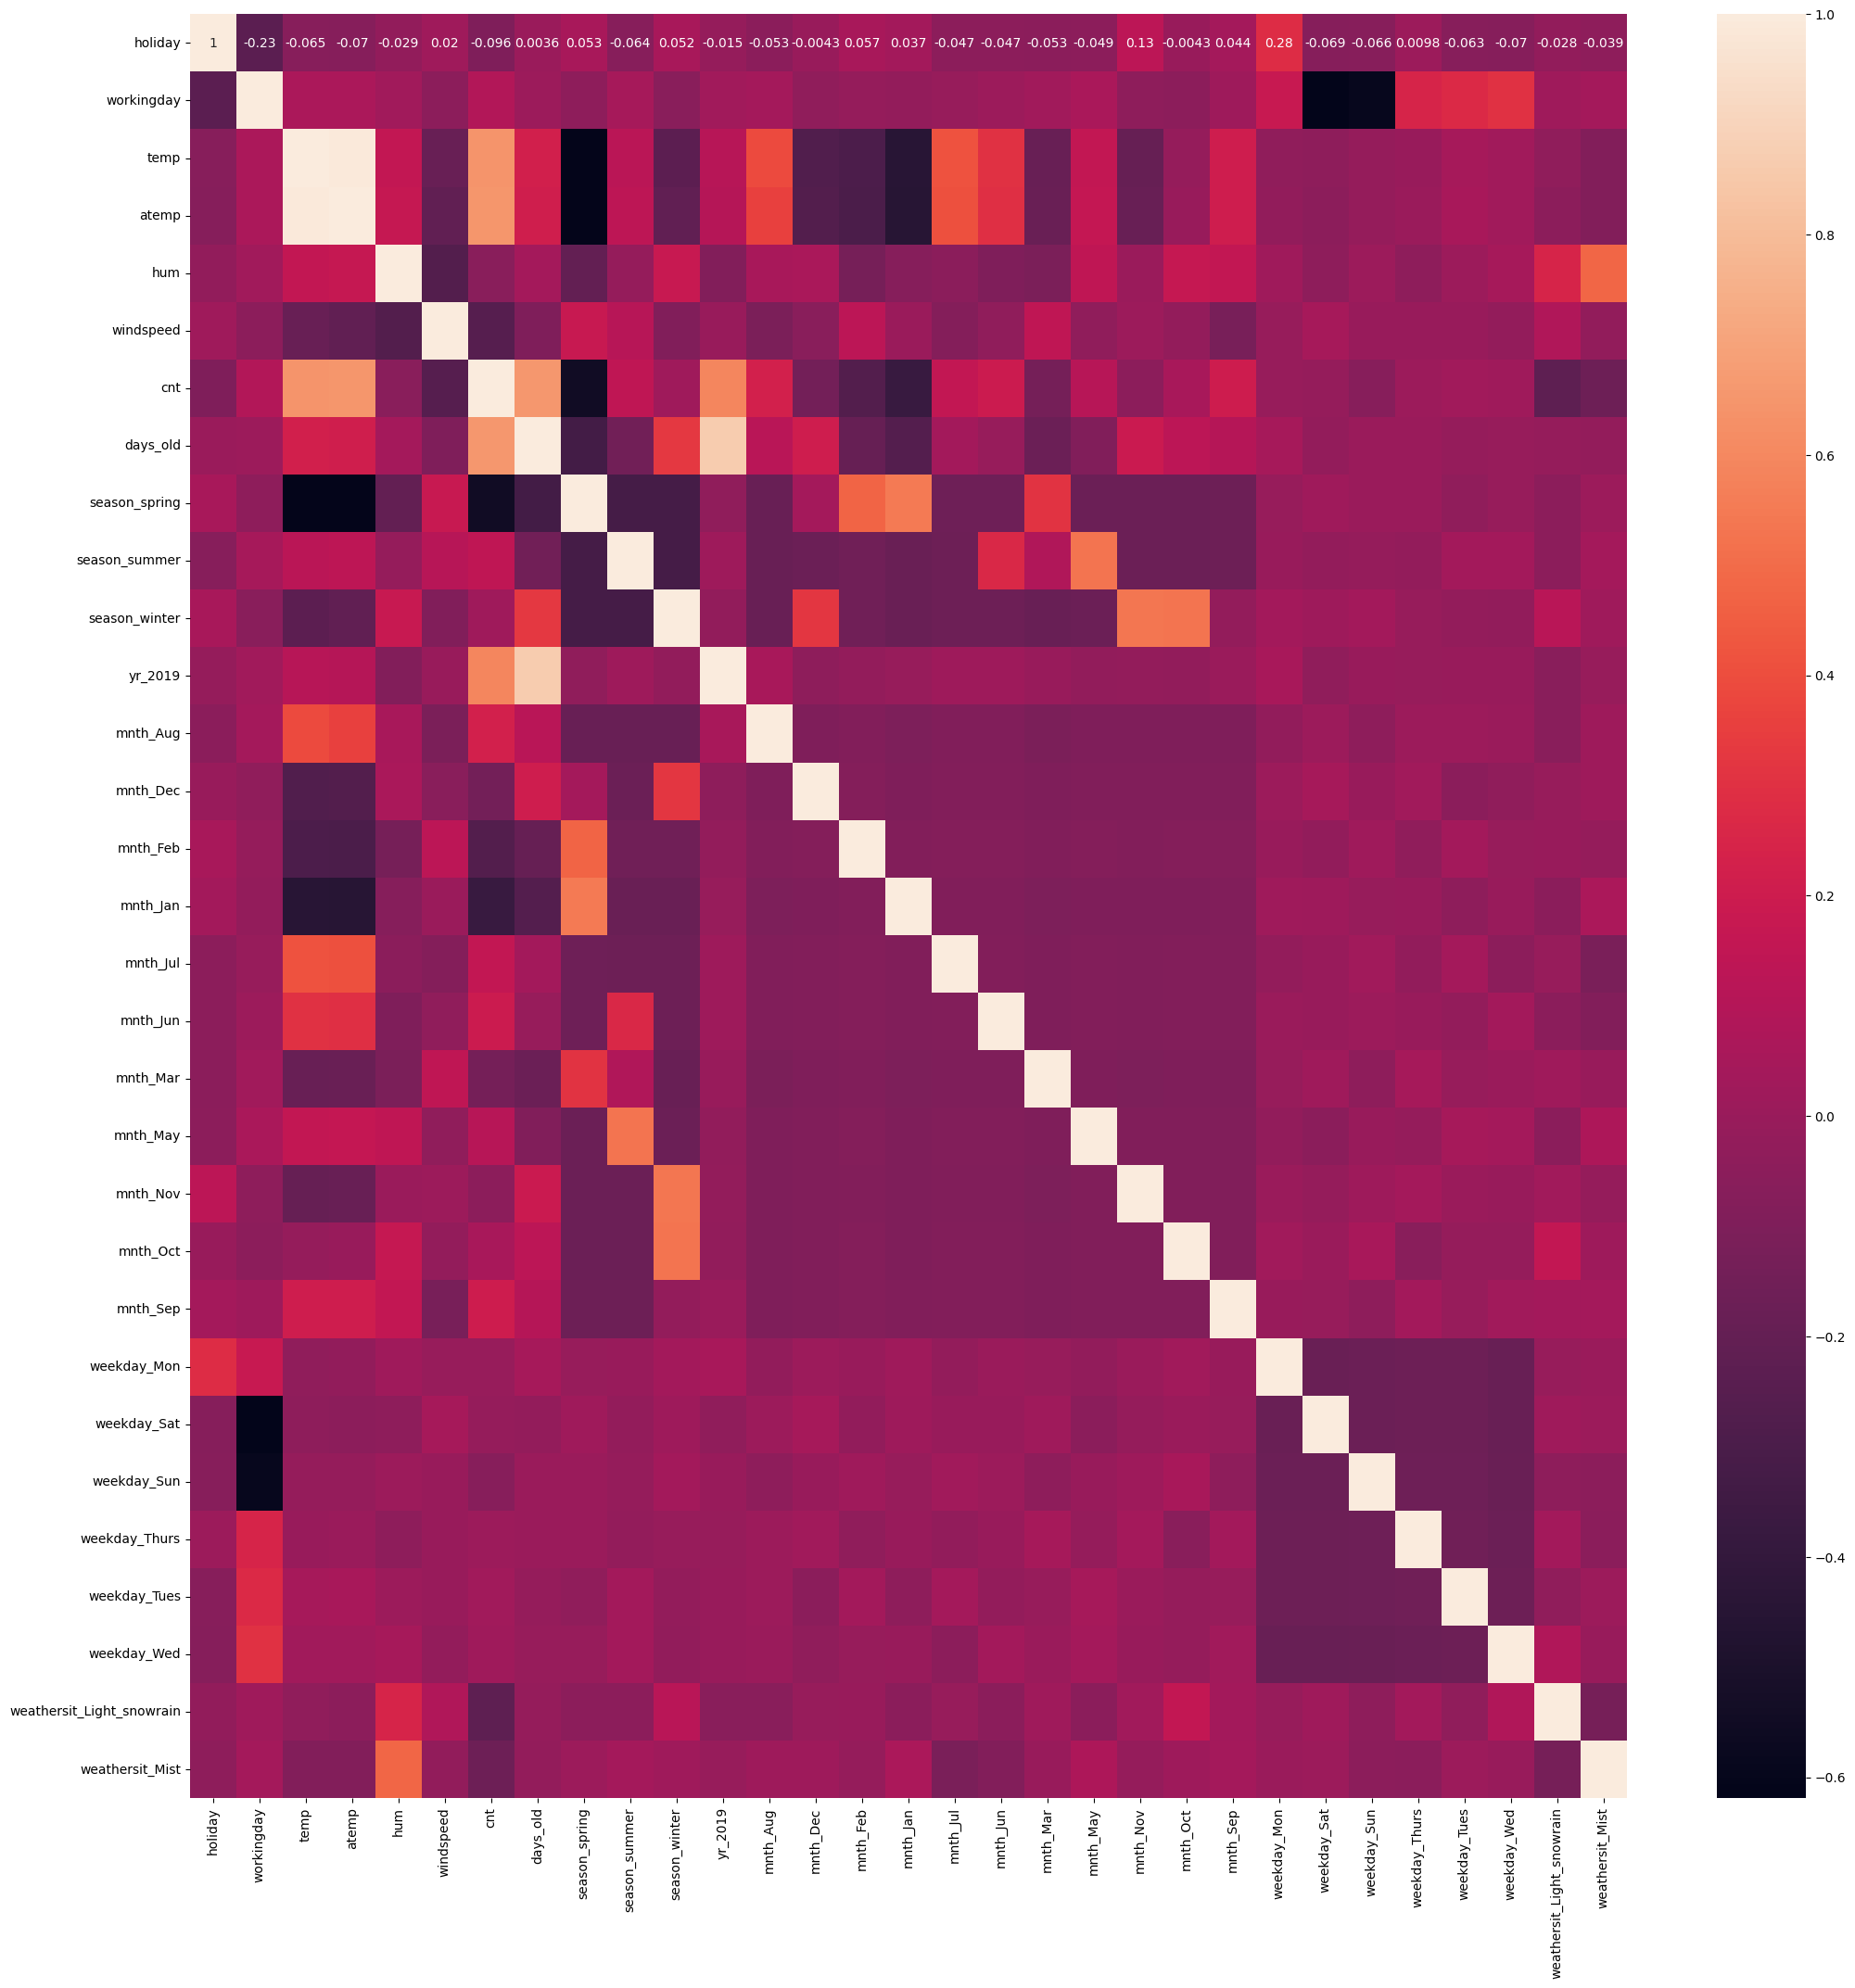

In [269]:
#heatmap
plt.figure(figsize = (25,25))
sns.heatmap(df_train_corr,annot=True)

OBSERVATION:
cnt has good correlation with temp and atemp
cnt shows good corr with year also

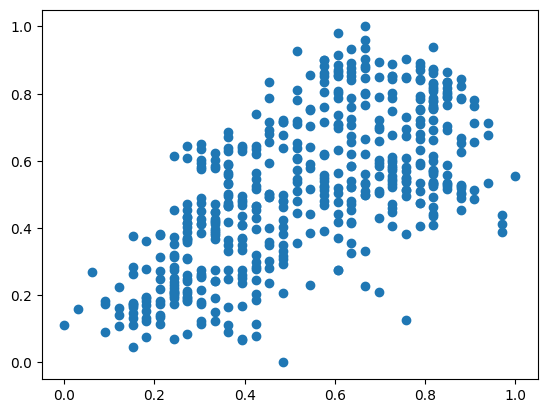

In [270]:
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

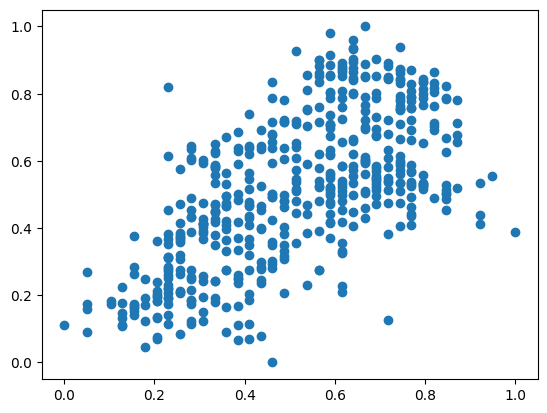

In [271]:
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

The above sctter plot shows positive relation between cvt and temp

In [272]:
X_train=df_train
y_train=df_train.pop('cnt')

In [273]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [274]:
lr = LinearRegression()
lr.fit(X_train,y_train)

# Selecting 15 features using RFE 
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [275]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', False, 15),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 5),
 ('mnth_Dec', False, 10),
 ('mnth_Feb', False, 9),
 ('mnth_Jan', False, 3),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 8),
 ('mnth_Mar', False, 7),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 16),
 ('mnth_Oct', False, 4),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 11),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thurs', False, 13),
 ('weekday_Tues', False, 12),
 ('weekday_Wed', False, 14),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Mist', True, 1)]

In [276]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
print(col)

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'yr_2019', 'mnth_Jul', 'mnth_Sep',
       'weekday_Sat', 'weekday_Sun', 'weathersit_Light_snowrain',
       'weathersit_Mist'],
      dtype='object')


In [277]:
# Checking the Rejected column
X_train.columns[~rfe.support_]

Index(['days_old', 'season_summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_Mon', 'weekday_Thurs', 'weekday_Tues', 'weekday_Wed'],
      dtype='object')

In [278]:
#function to get the VIF
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features_cols'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [279]:
#dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [280]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features_cols,VIF
2,temp,46.87
3,atemp,45.75
1,workingday,41.44
11,weekday_Sat,10.11
12,weekday_Sun,9.82
0,holiday,2.57
6,season_spring,2.54
4,hum,1.90
7,season_winter,1.78
14,weathersit_Mist,1.57


In [281]:
df_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_snowrain,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.533571,0.512217,0.645826,0.322917,367.680392,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.157763,0.468282,0.225145,0.207737,0.145867,0.165495,209.596164,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.333333,0.333333,0.536082,0.218750,186.250000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.545455,0.538462,0.649485,0.312500,372.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.727273,0.692308,0.752577,0.406250,551.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,728.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#1ST LINEAR MODEL:

In [282]:
#Adding the constant
X_train_lm_1 = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.7
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.38e-188
Time:                        22:14:21   Log-Likelihood:                 510.90
No. Observations:                 510   AIC:                            -991.8
Df Residuals:                     495   BIC:                            -928.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [283]:
# As Temp shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['temp'], axis = 1)

In [284]:
#CALLING THE FUNCTION TO CALCULATE VIF
calculateVIF(X_train_new)

,Features_cols,VIF
1,workingday,41.44
10,weekday_Sat,10.11
11,weekday_Sun,9.82
2,atemp,2.91
0,holiday,2.57
5,season_spring,2.48
3,hum,1.90
6,season_winter,1.71
13,weathersit_Mist,1.57
8,mnth_Jul,1.29


2ND LINEAR MODEL:

In [285]:
# As Temp shows high VIF values hence we can drop it
#Adding the constant
X_train_lm_2 = sm.add_constant(X_train_new)

lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.4
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          3.01e-188
Time:                        22:14:21   Log-Likelihood:                 507.33
No. Observations:                 510   AIC:                            -986.7
Df Residuals:                     496   BIC:                            -927.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [286]:
# We can drop july variable as it has high VIF-value
X_train_new = X_train_new.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features_cols,VIF
2,hum,23.27
1,atemp,15.60
3,windspeed,4.14
4,season_spring,2.47
12,weathersit_Mist,2.26
6,yr_2019,2.05
5,season_winter,2.02
7,mnth_Jul,1.39
9,weekday_Sat,1.23
10,weekday_Sun,1.23


3RD MODEL:

In [287]:
#Adding the constant
X_train_lm_3 = sm.add_constant(X_train_new)

lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.4
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          3.01e-188
Time:                        22:14:21   Log-Likelihood:                 507.33
No. Observations:                 510   AIC:                            -986.7
Df Residuals:                     496   BIC:                            -927.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

4TH MODEL:

In [288]:
#Adding the constant
X_train_lm_4 = sm.add_constant(X_train_new)

lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.4
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          3.01e-188
Time:                        22:14:21   Log-Likelihood:                 507.33
No. Observations:                 510   AIC:                            -986.7
Df Residuals:                     496   BIC:                            -927.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [289]:
# We can drop hum variable as it has high vif-value
X_train_new = X_train_new.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features_cols,VIF
1,atemp,4.77
2,windspeed,4.11
5,yr_2019,2.05
3,season_spring,1.66
11,weathersit_Mist,1.52
4,season_winter,1.43
6,mnth_Jul,1.35
8,weekday_Sat,1.23
9,weekday_Sun,1.22
7,mnth_Sep,1.20


5TH LINEAR MODEL:

In [290]:
#Adding the constant
X_train_lm_5 = sm.add_constant(X_train_new)

lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.5
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          4.94e-186
Time:                        22:14:21   Log-Likelihood:                 499.27
No. Observations:                 510   AIC:                            -972.5
Df Residuals:                     497   BIC:                            -917.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [291]:
# We can drop  variable as it has high p-value
X_train_new = X_train_new.drop(['weekday_Sat'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features_cols,VIF
1,atemp,4.72
2,windspeed,4.07
5,yr_2019,2.05
3,season_spring,1.65
10,weathersit_Mist,1.52
4,season_winter,1.41
6,mnth_Jul,1.34
7,mnth_Sep,1.20
8,weekday_Sun,1.18
9,weathersit_Light_snowrain,1.08


6TH LINEAR MODEL:

In [292]:
#Adding the constant
X_train_lm_6 = sm.add_constant(X_train_new)

lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.5
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          5.23e-187
Time:                        22:14:21   Log-Likelihood:                 498.76
No. Observations:                 510   AIC:                            -973.5
Df Residuals:                     498   BIC:                            -922.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
Observation:
1.p-value for all the feature is less than 0.005. 2.VIF Value for all the feature is less the 5. 3.F-Static is 229.5. 4.p(F-static) is 5.23e-187 almost equal to 0. 5.In conclusion this model lr_6 is the best fit as it has low multi collinearity b/w the predicators.

CHECKING THE PARAMETERS AND THE COEFFICIENT VALUES:

In [293]:
# Checking the parameters and their coefficient values
lr_6.params

const                        0.259131
holiday                     -0.102138
atemp                        0.472177
windspeed                   -0.126419
season_spring               -0.118528
season_winter                0.038541
yr_2019                      0.235061
mnth_Jul                    -0.065876
mnth_Sep                     0.057949
weekday_Sun                 -0.048424
weathersit_Light_snowrain   -0.286817
weathersit_Mist             -0.082277
dtype: float64

Residual Analysis of the train dataand validation:

In [294]:
X_train_lm_6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   const                      510 non-null    float64
 1   holiday                    510 non-null    int64  
 2   atemp                      510 non-null    float64
 3   windspeed                  510 non-null    float64
 4   season_spring              510 non-null    int64  
 5   season_winter              510 non-null    int64  
 6   yr_2019                    510 non-null    int64  
 7   mnth_Jul                   510 non-null    int64  
 8   mnth_Sep                   510 non-null    int64  
 9   weekday_Sun                510 non-null    int64  
 10  weathersit_Light_snowrain  510 non-null    int64  
 11  weathersit_Mist            510 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 51.8 KB


In [295]:
X_train_lm_6.describe()

,const,holiday,atemp,windspeed,season_spring,season_winter,yr_2019,mnth_Jul,mnth_Sep,weekday_Sun,weathersit_Light_snowrain,weathersit_Mist
count,510.0,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,1.0,0.025490,0.512217,0.322917,0.243137,0.247059,0.507843,0.076471,0.080392,0.143137,0.029412,0.345098
std,0.0,0.157763,0.207737,0.165495,0.429398,0.431725,0.500429,0.266010,0.272166,0.350557,0.169124,0.475867
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.333333,0.218750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,0.538462,0.312500,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,0.000000,0.692308,0.406250,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [296]:
X_train_lm_6.head()

,const,holiday,atemp,windspeed,season_spring,season_winter,yr_2019,mnth_Jul,mnth_Sep,weekday_Sun,weathersit_Light_snowrain,weathersit_Mist
576,1.0,0,0.769231,0.28125,0,0,1,1,0,0,0,0
426,1.0,0,0.435897,0.25000,1,0,1,0,0,0,0,1
728,1.0,0,0.205128,0.65625,1,0,1,0,0,1,0,0
482,1.0,0,0.384615,0.18750,0,0,1,0,0,0,0,1
111,1.0,0,0.333333,0.37500,0,0,0,0,0,0,0,1


In [297]:
y_train_pred = lr_6.predict(X_train_lm_6)

Error Term Distribution:

Text(0.5, 0, 'Errors')

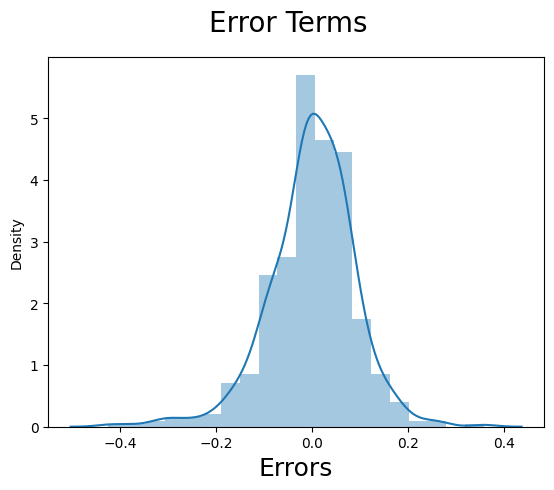

In [298]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

performing Multicolinearity:

In [299]:
calculateVIF(X_train_new)

,Features_cols,VIF
1,atemp,4.72
2,windspeed,4.07
5,yr_2019,2.05
3,season_spring,1.65
10,weathersit_Mist,1.52
4,season_winter,1.41
6,mnth_Jul,1.34
7,mnth_Sep,1.20
8,weekday_Sun,1.18
9,weathersit_Light_snowrain,1.08


<Axes: >

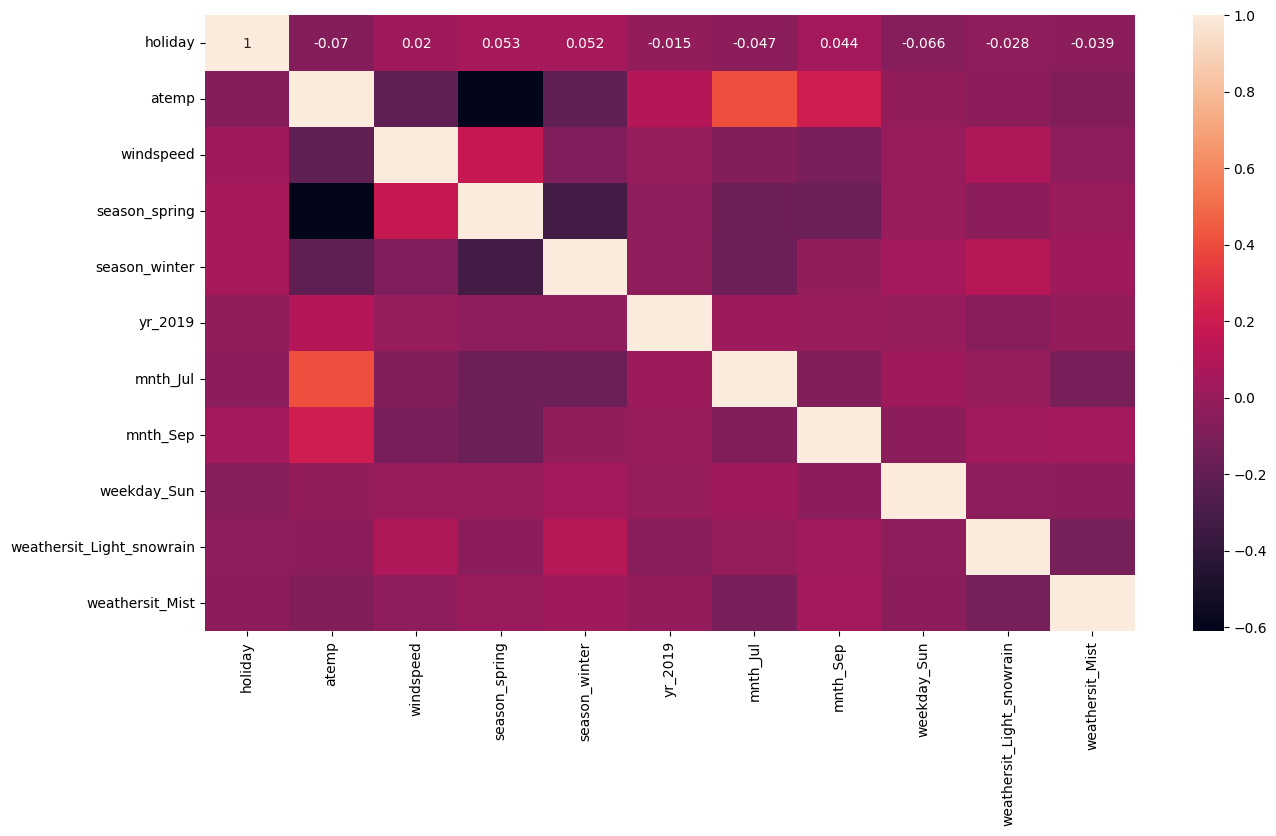

In [300]:
# heatmap to see the correlation
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot=True)

observation:
1. VIF values <5 are good
2. No multicolinearity as seen from the heatmap

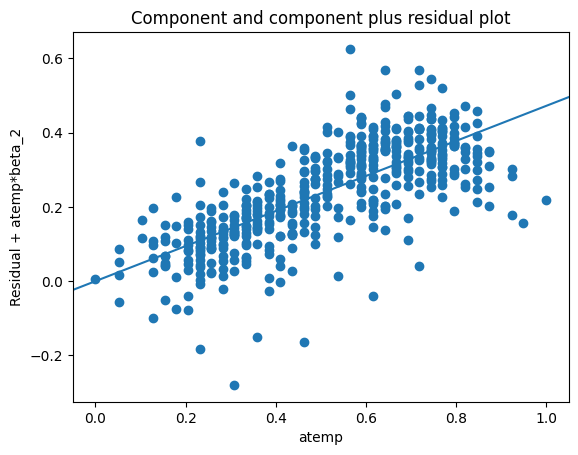

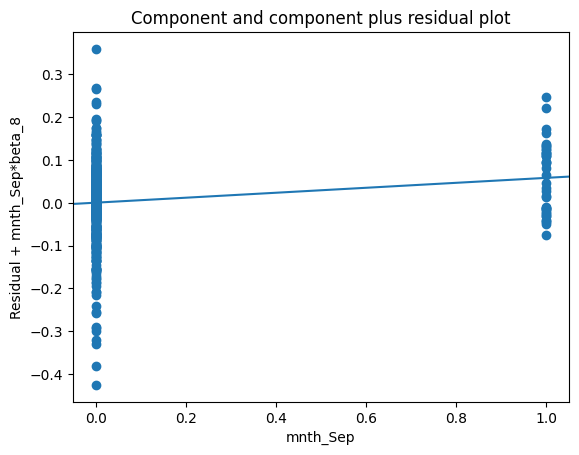

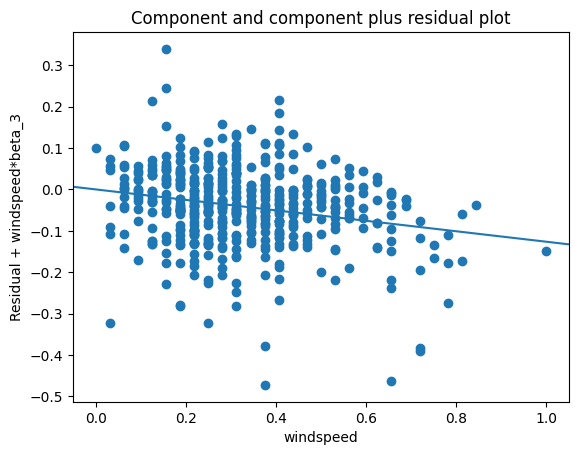

In [301]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'atemp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'mnth_Sep')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

HOMOSCEDASTICITY:

In [302]:
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred

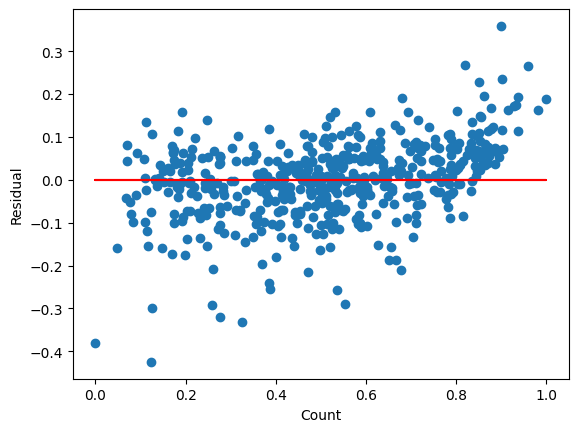

In [303]:
# visualizing to see if there is any pattern
plt.scatter(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

OBSERVATION:
No Visible Pattern has been observed.

MAKING PREDICTION:


In [304]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_snowrain,weathersit_Mist
184,1,0,0.818182,0.769231,0.649485,0.09375,0.692706,184,0,0,...,0,0,1,0,0,0,0,0,0,1
535,0,1,0.909091,0.846154,0.608247,0.15625,0.712034,535,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,1,0.515152,0.487179,0.835052,0.34375,0.303382,299,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,1,0.878788,0.794872,0.432990,0.34375,0.547400,221,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,1,0.818182,0.743590,0.309278,0.53125,0.569029,152,0,1,...,0,0,0,0,0,1,0,0,0,0


In [305]:
df_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_snowrain,weathersit_Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.036364,0.700000,0.553857,0.532634,0.633646,0.315625,0.522154,357.127273,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.187620,0.459303,0.232754,0.212565,0.148671,0.154914,0.219163,214.116582,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.030303,0.025641,0.257732,-0.031250,0.048205,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.363636,0.358974,0.523196,0.218750,0.378595,170.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.545455,0.538462,0.618557,0.312500,0.524678,349.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.757576,0.717949,0.742268,0.406250,0.677750,538.750000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.969697,0.974359,1.000000,0.781250,0.963300,729.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [306]:
y_test = df_test.pop('cnt')
X_test = df_test

In [307]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [308]:
y_pred = lr_6.predict(X_test_lm_6)

In [309]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8113

MODEL EVALUATION


Viuslizing te graph for actual versus predicted values

Text(0, 0.5, 'y_pred')

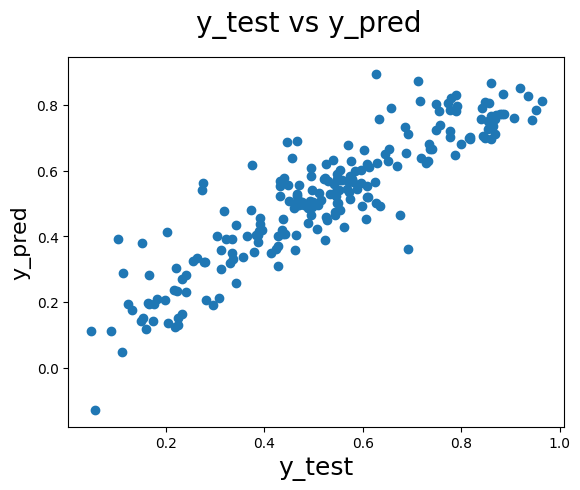

In [310]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [311]:
round(lr_6.params,4)

const                        0.2591
holiday                     -0.1021
atemp                        0.4722
windspeed                   -0.1264
season_spring               -0.1185
season_winter                0.0385
yr_2019                      0.2351
mnth_Jul                    -0.0659
mnth_Sep                     0.0579
weekday_Sun                 -0.0484
weathersit_Light_snowrain   -0.2868
weathersit_Mist             -0.0823
dtype: float64

In [312]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.8014


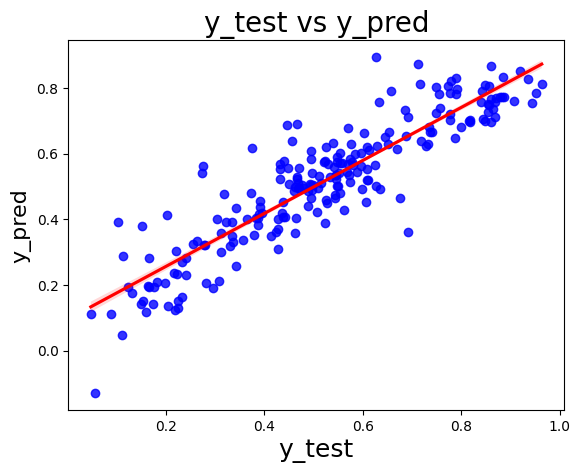

In [313]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

Comparision between Training and Testing dataset:
Train dataset R^2 : 0.835
Test dataset R^2 : 0.8113
Train dataset Adjusted R^2 : 0.829
Test dataset Adjusted R^2 : 0.832 Demand of bikes depend on year, holiday, atemp, windspeed, sep, Light_snowrain, Mist, spring, summer and winter.